In [1]:
# import pandas and call it pd, numpy as np, matplotlib.pyplot as plt, contextily as ctx, geopandas as gpd, os, and matplot toolkitds
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import contextily as ctx 
import geopandas as gpd 
import fiona
import os 
from osgeo import gdal
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
# read csv file and store it as HCI_interest_df
HCI_interest_df = pd.read_csv("SlackInterestFormResponsesHCISignupResponses_geocoded.csv")

In [3]:
# check out first five rows 
HCI_interest_df.head()

,Timestamp,Occupation (check all that apply),"If you work for a company/organization, please add your title/role",How would you describe your level of expertise in History Communication,What types of activities are you looking for in the HCI Slack channel? (Select all that apply),State Location,Country Location,What History Communication topics are you most interested in? (select all that apply),"If Other, please describe below",Our aim at the HCI is to build a community of practice around history communication. What are some other ways we can build greater community?,...,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source
0,2022-08-17T05:29:20-04:00,"Public history (museums, national/state parks,...",NaN,"Mid career - some experience, interested in gr...","Networking, Info sharing, skill building & oth...",NaN,Germany,"Social media, Podcasting, social audio",NaN,NaN,...,NaN,NaN,NaN,NaN,Germany,GA,Rabun County,30525.0,US,TIGER/Line® dataset from the US Census Bureau
1,2022-08-17T09:09:43-04:00,"Academia (4-year, 2-year, community college, e...",Founder of badancient.com,"Expert - I have a lot of experience, happy to ...","Networking, Info sharing, skill building & oth...",NaN,United Kingdom,"Social media, Broadcast media and journalism, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,United,PA,Westmoreland County,15689.0,US,TIGER/Line® dataset from the US Census Bureau
2,2022-09-11T11:41:41-04:00,"Public history (museums, national/state parks,...",High School History Teacher,"Beginner - new to the field, eager to learn more","Networking, Info sharing, skill building & oth...",VA,NaN,"Social media, Broadcast media and journalism, ...",NaN,"Conferences, workshops, virtual meetings (such...",...,NaN,NaN,NaN,NaN,NaN,VA,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau
3,2022-09-18T11:51:01-04:00,"Public history (museums, national/state parks,...",NaN,"Beginner - new to the field, eager to learn more","Networking, Info sharing, skill building & oth...",VA,NaN,"Broadcast media and journalism, Teaching / ped...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,VA,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau
4,2022-10-13T10:25:22-04:00,"Media, journalism, etc., Self-employed/Consult...",NaN,"Mid career - some experience, interested in gr...","Networking, Info sharing, skill building & oth...",TN,NaN,"Social media, Broadcast media and journalism, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,TN,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau


In [4]:
# look at columns in dataset
HCI_interest_df.columns

Index(['Timestamp', 'Occupation (check all that apply)',
       'If you work for a company/organization, please add your title/role',
       'How would you describe your level of expertise in History Communication',
       'What types of activities are you looking for in the HCI Slack channel? (Select all that apply)',
       'State Location', 'Country Location',
       'What History Communication topics are you most interested in? (select all that apply)',
       'If Other, please describe below',
       'Our aim at the HCI is to build a community of practice around history communication. What are some other ways we can build greater community?',
       'Are you interested in speaking engagement related to history communication?',
       'Are you interested in volunteering or helping with History Communication Institute projects?',
       'Do you know of any RESOURCES or ORGANIZATIONS we should be aware of? If so, please list below:',
       'How did you hear about HCI community Slack

In [5]:
# rename columns
HCI_interest_df = HCI_interest_df.rename(columns={'Timestamp': 'Timestamp', 'Occupation (check all that apply)': 'Occupation',
                                                 'If you work for a company/organization, please add your title/role': 'Title/Role','How would you describe your level of expertise in History Communication': 'Expertise Level',
                                                 'What types of activities are you looking for in the HCI Slack channel? (Select all that apply)': 'Activities Looking For',
                                                 'State Location': 'StateLocation','Country Location': 'CountryLocation',
                                                 'What History Communication topics are you most interested in? (select all that apply)': 'History Communication Topics of Interest',
                                                 'If Other, please describe below': 'History Communication Topics of Interest - Other',
                                                 'Our aim at the HCI is to build a community of practice around history communication. What are some other ways we can build greater community?': 'HCI Community Building',
                                                  'Are you interested in speaking engagement related to history communication?': 'Speaking Engagement Interest',
                                                  'Are you interested in volunteering or helping with History Communication Institute projects?': 'Volunteering Interest',
                                                  'Do you know of any RESOURCES or ORGANIZATIONS we should be aware of? If so, please list below:': 'Resources or Organizations',
                                                  'How did you hear about HCI community Slack group?': 'How Did You Hear', 
                                                  'Additional Comments?': 'Additional Comments',
                                                  'By.joining.the.Slack.channel..I.agree.to.the.History.Communication.Institute.s.Code.of.Conduct....1..Be.nice.to.everyone.and.do.not.be.mean.to.anyone.2..Treat.all.participants.with.respect.and.dignity.3..Stay.curious.and.open.minded.4..Don.t.act.like.you.know.all.the.answers.5..Don.t.hog.the.mic..don.t.endlessly.self.promote..Those.who.don.t.adhere.to.the.guidelines.will.be.removed.': 'Agreement',
                                                  'Latitude': 'Latitude', 'Longitude': 'Longitude',
                                                  'Accuracy Score': 'AccuracyScore', 'Accuracy Type': 'Accuracy Type',
                                                  'Number': 'Number', 'Street': 'Street', 'Unit Type': 'Unit Type', 
                                                  'Unit Number': 'Unit Number', 'City': 'City', 'State': 'State', 'County': 'County',
                                                  'Zip': 'Zip', 'Country': 'Country', 'Source': 'Source'})

In [6]:
# check out data
HCI_interest_df.head()

,Timestamp,Occupation,Title/Role,Expertise Level,Activities Looking For,StateLocation,CountryLocation,History Communication Topics of Interest,History Communication Topics of Interest - Other,HCI Community Building,...,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source
0,2022-08-17T05:29:20-04:00,"Public history (museums, national/state parks,...",NaN,"Mid career - some experience, interested in gr...","Networking, Info sharing, skill building & oth...",NaN,Germany,"Social media, Podcasting, social audio",NaN,NaN,...,NaN,NaN,NaN,NaN,Germany,GA,Rabun County,30525.0,US,TIGER/Line® dataset from the US Census Bureau
1,2022-08-17T09:09:43-04:00,"Academia (4-year, 2-year, community college, e...",Founder of badancient.com,"Expert - I have a lot of experience, happy to ...","Networking, Info sharing, skill building & oth...",NaN,United Kingdom,"Social media, Broadcast media and journalism, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,United,PA,Westmoreland County,15689.0,US,TIGER/Line® dataset from the US Census Bureau
2,2022-09-11T11:41:41-04:00,"Public history (museums, national/state parks,...",High School History Teacher,"Beginner - new to the field, eager to learn more","Networking, Info sharing, skill building & oth...",VA,NaN,"Social media, Broadcast media and journalism, ...",NaN,"Conferences, workshops, virtual meetings (such...",...,NaN,NaN,NaN,NaN,NaN,VA,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau
3,2022-09-18T11:51:01-04:00,"Public history (museums, national/state parks,...",NaN,"Beginner - new to the field, eager to learn more","Networking, Info sharing, skill building & oth...",VA,NaN,"Broadcast media and journalism, Teaching / ped...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,VA,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau
4,2022-10-13T10:25:22-04:00,"Media, journalism, etc., Self-employed/Consult...",NaN,"Mid career - some experience, interested in gr...","Networking, Info sharing, skill building & oth...",TN,NaN,"Social media, Broadcast media and journalism, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,TN,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau


In [7]:
# drop rows where Country Location is not missing and State Location is missing
HCI_interest_df_state_to_be_mapped = HCI_interest_df.drop(HCI_interest_df[(HCI_interest_df['CountryLocation'].notna()) & (HCI_interest_df['StateLocation'].isna())].index)

In [8]:
HCI_interest_df_state_to_be_mapped

,Timestamp,Occupation,Title/Role,Expertise Level,Activities Looking For,StateLocation,CountryLocation,History Communication Topics of Interest,History Communication Topics of Interest - Other,HCI Community Building,...,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source
2,2022-09-11T11:41:41-04:00,"Public history (museums, national/state parks,...",High School History Teacher,"Beginner - new to the field, eager to learn more","Networking, Info sharing, skill building & oth...",VA,NaN,"Social media, Broadcast media and journalism, ...",NaN,"Conferences, workshops, virtual meetings (such...",...,NaN,NaN,NaN,NaN,NaN,VA,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau
3,2022-09-18T11:51:01-04:00,"Public history (museums, national/state parks,...",NaN,"Beginner - new to the field, eager to learn more","Networking, Info sharing, skill building & oth...",VA,NaN,"Broadcast media and journalism, Teaching / ped...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,VA,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau
4,2022-10-13T10:25:22-04:00,"Media, journalism, etc., Self-employed/Consult...",NaN,"Mid career - some experience, interested in gr...","Networking, Info sharing, skill building & oth...",TN,NaN,"Social media, Broadcast media and journalism, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,TN,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau
5,2022-10-13T10:59:03-04:00,"Media, journalism, etc.","Digital Editorial Director, Smithsonianmag.com","Mid career - some experience, interested in gr...","Networking, Finding helpful books, articles an...",DC,NaN,"Podcasting, social audio, Writing for a genera...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,DC,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau
8,2022-10-13T22:21:26-04:00,"Media, journalism, etc.",NaN,"Mid career - some experience, interested in gr...","Networking, Info sharing, skill building & oth...",FL,NaN,"Social media, Broadcast media and journalism, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,FL,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2024-04-09T20:18:30-04:00,NaN,NaN,NaN,NaN,CA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,CA,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau
255,2024-06-02T20:39:53-04:00,NaN,NaN,NaN,NaN,NJ,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NJ,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau
256,2024-06-07T13:25:01-04:00,NaN,NaN,NaN,NaN,VA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,VA,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau
257,2022-09-15T00:05:34-04:00,NaN,NaN,NaN,NaN,MD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,MD,NaN,NaN,US,TIGER/Line® dataset from the US Census Bureau


In [9]:
# aggregate data and store as aggregated_state_data
aggregated_state_data = HCI_interest_df_state_to_be_mapped.groupby(['StateLocation']).size().reset_index(name='Count')

In [10]:
# check out aggregate_state_data
aggregated_state_data

,StateLocation,Count
0,AE,1
1,AL,2
2,AR,1
3,AZ,3
4,CA,11
5,CO,2
6,CT,3
7,DC,15
8,DE,1
9,FL,6


In [11]:
# read us states shapefile and name it states
states = gpd.read_file("cb_2019_us_state_5m.shp")

In [12]:
# check out the crs
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [13]:
# set the crs for states to 2163
states = states.to_crs(epsg=2163)

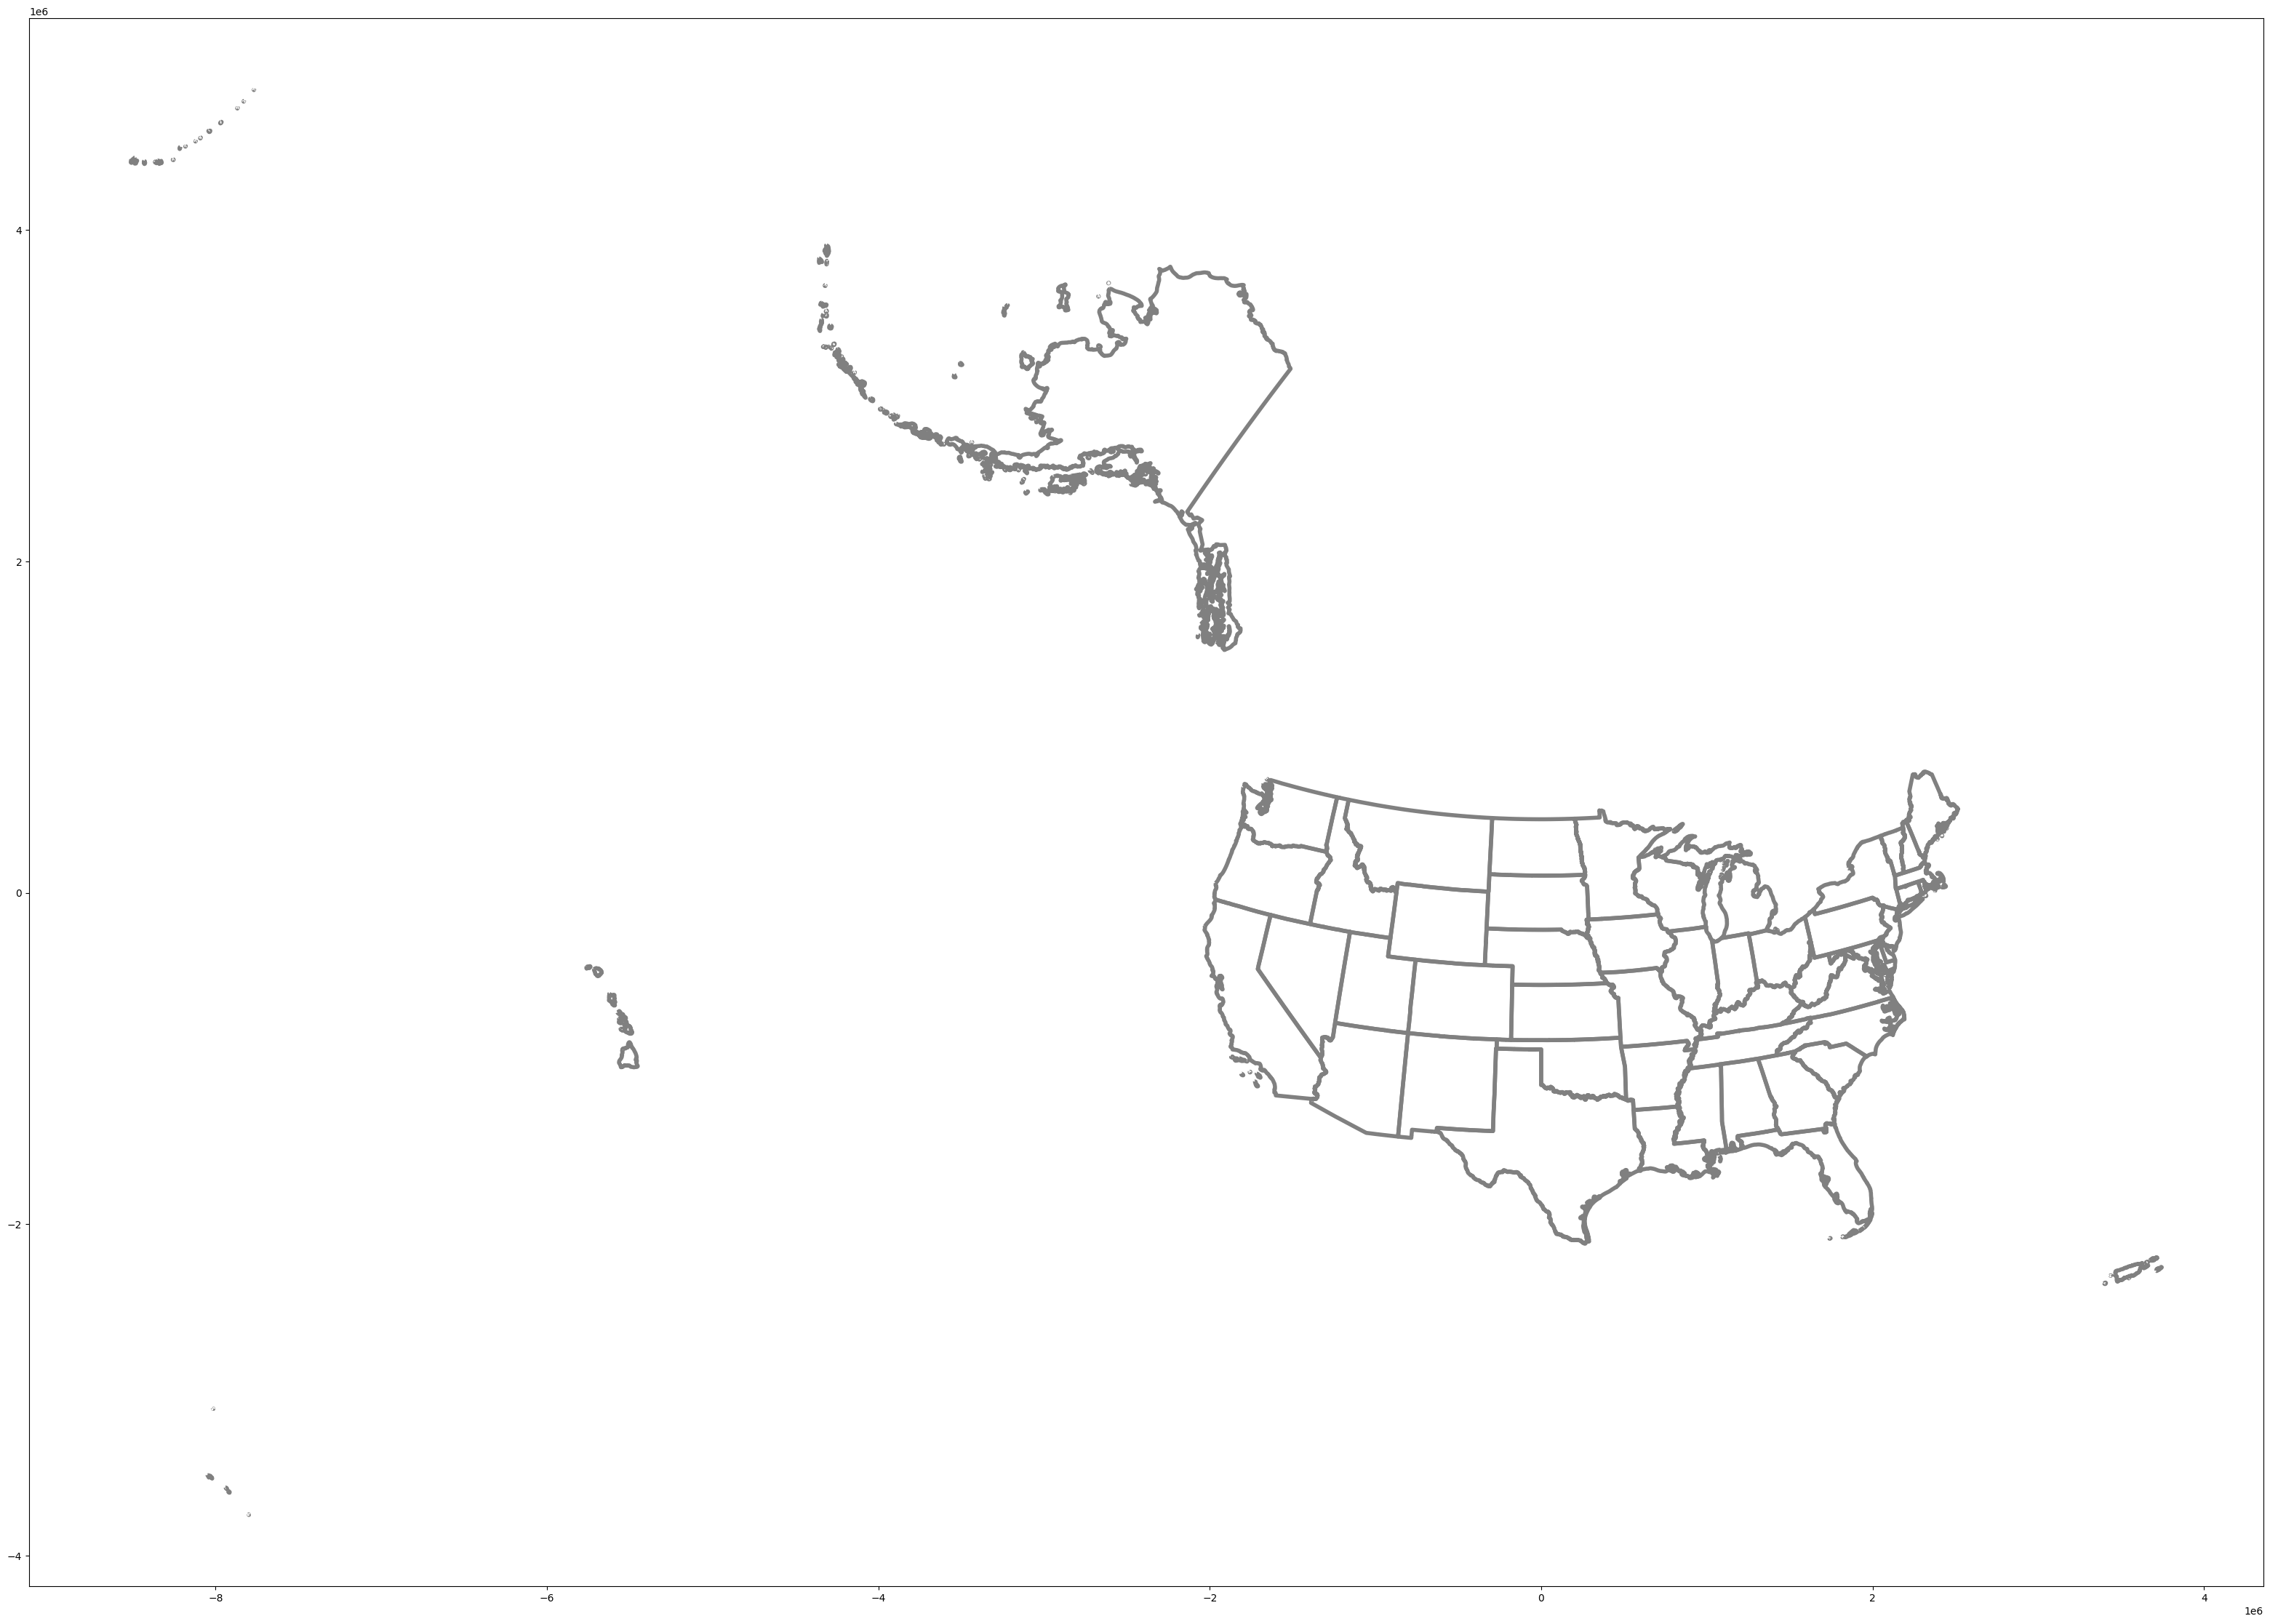

In [14]:
# plot the states map as usual
states_map = states.boundary.plot(figsize=(50, 28), color="Gray", linewidth=4)

# show the plot
plt.show()

In [15]:
# save states that are in state location as HCI_repsondent_geometries
HCI_respondent_state_geometries = states[states['STUSPS'].isin(HCI_interest_df_state_to_be_mapped['StateLocation'])]

In [16]:
# save centroids from HCI_respondent_geometires
HCI_respondent_state_geometries['centroid'] = HCI_respondent_state_geometries.centroid

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [17]:
# merge aggregated state counts with HCI_respondent_state_geometries
HCI_respondent_state_geometries = pd.merge(HCI_respondent_state_geometries, aggregated_state_data, left_on='STUSPS',right_on='StateLocation', how='left')

In [18]:
# check out HCI_respondent_state_geometries
HCI_respondent_state_geometries

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,centroid,StateLocation,Count
0,23,01779787,0400000US23,23,ME,Maine,00,79887659040,11745717739,"MULTIPOLYGON (((2444957.739 389140.034, 244493...",POINT (2331197.653 492847.971),ME,2
1,10,01779781,0400000US10,10,DE,Delaware,00,5046620081,1399291164,"MULTIPOLYGON (((2056913.921 -289836.907, 20577...",POINT (2082372.94 -356702.903),DE,1
2,11,01702382,0400000US11,11,DC,District of Columbia,00,158340389,18687196,"POLYGON ((1950824.826 -402441.066, 1951737.376...",POINT (1960217.926 -403185.488),DC,15
3,45,01779799,0400000US45,45,SC,South Carolina,00,77864659170,5075874513,"POLYGON ((1515353.355 -990895.337, 1515580.313...",POINT (1753482.363 -1033043.435),SC,2
4,31,01779792,0400000US31,31,NE,Nebraska,00,198953801353,1374686302,"POLYGON ((-339378.208 -418863.338, -338684.03 ...",POINT (17087.764 -384766.656),NE,1
5,53,01779804,0400000US53,53,WA,Washington,00,172117954267,12549727444,"MULTIPOLYGON (((-1634037.628 566970.701, -1633...",POINT (-1519222.908 460906.684),WA,3
6,35,00897535,0400000US35,35,NM,New Mexico,00,314197253999,727781442,"POLYGON ((-862284.832 -1454476.3, -862055.894 ...",POINT (-562406.199 -1155573.28),NM,1
7,46,01785534,0400000US46,46,SD,South Dakota,00,196346195316,3383460688,"POLYGON ((-318890.806 7702.207, -318302.166 76...",POINT (-18005.462 -61737.633),SD,4
8,48,01779801,0400000US48,48,TX,Texas,00,676668210823,18991880422,"POLYGON ((-630703.394 -1429224.113, -630219.81...",POINT (64945.331 -1500203.984),TX,8
9,06,01779778,0400000US06,06,CA,California,00,403660088482,20305454540,"MULTIPOLYGON (((-1717278.368 -1090204.876, -17...",POINT (-1707899.93 -667331.061),CA,11


In [19]:
# check that count is numeric
HCI_respondent_state_geometries['Count'] = pd.to_numeric(HCI_respondent_state_geometries['Count'])

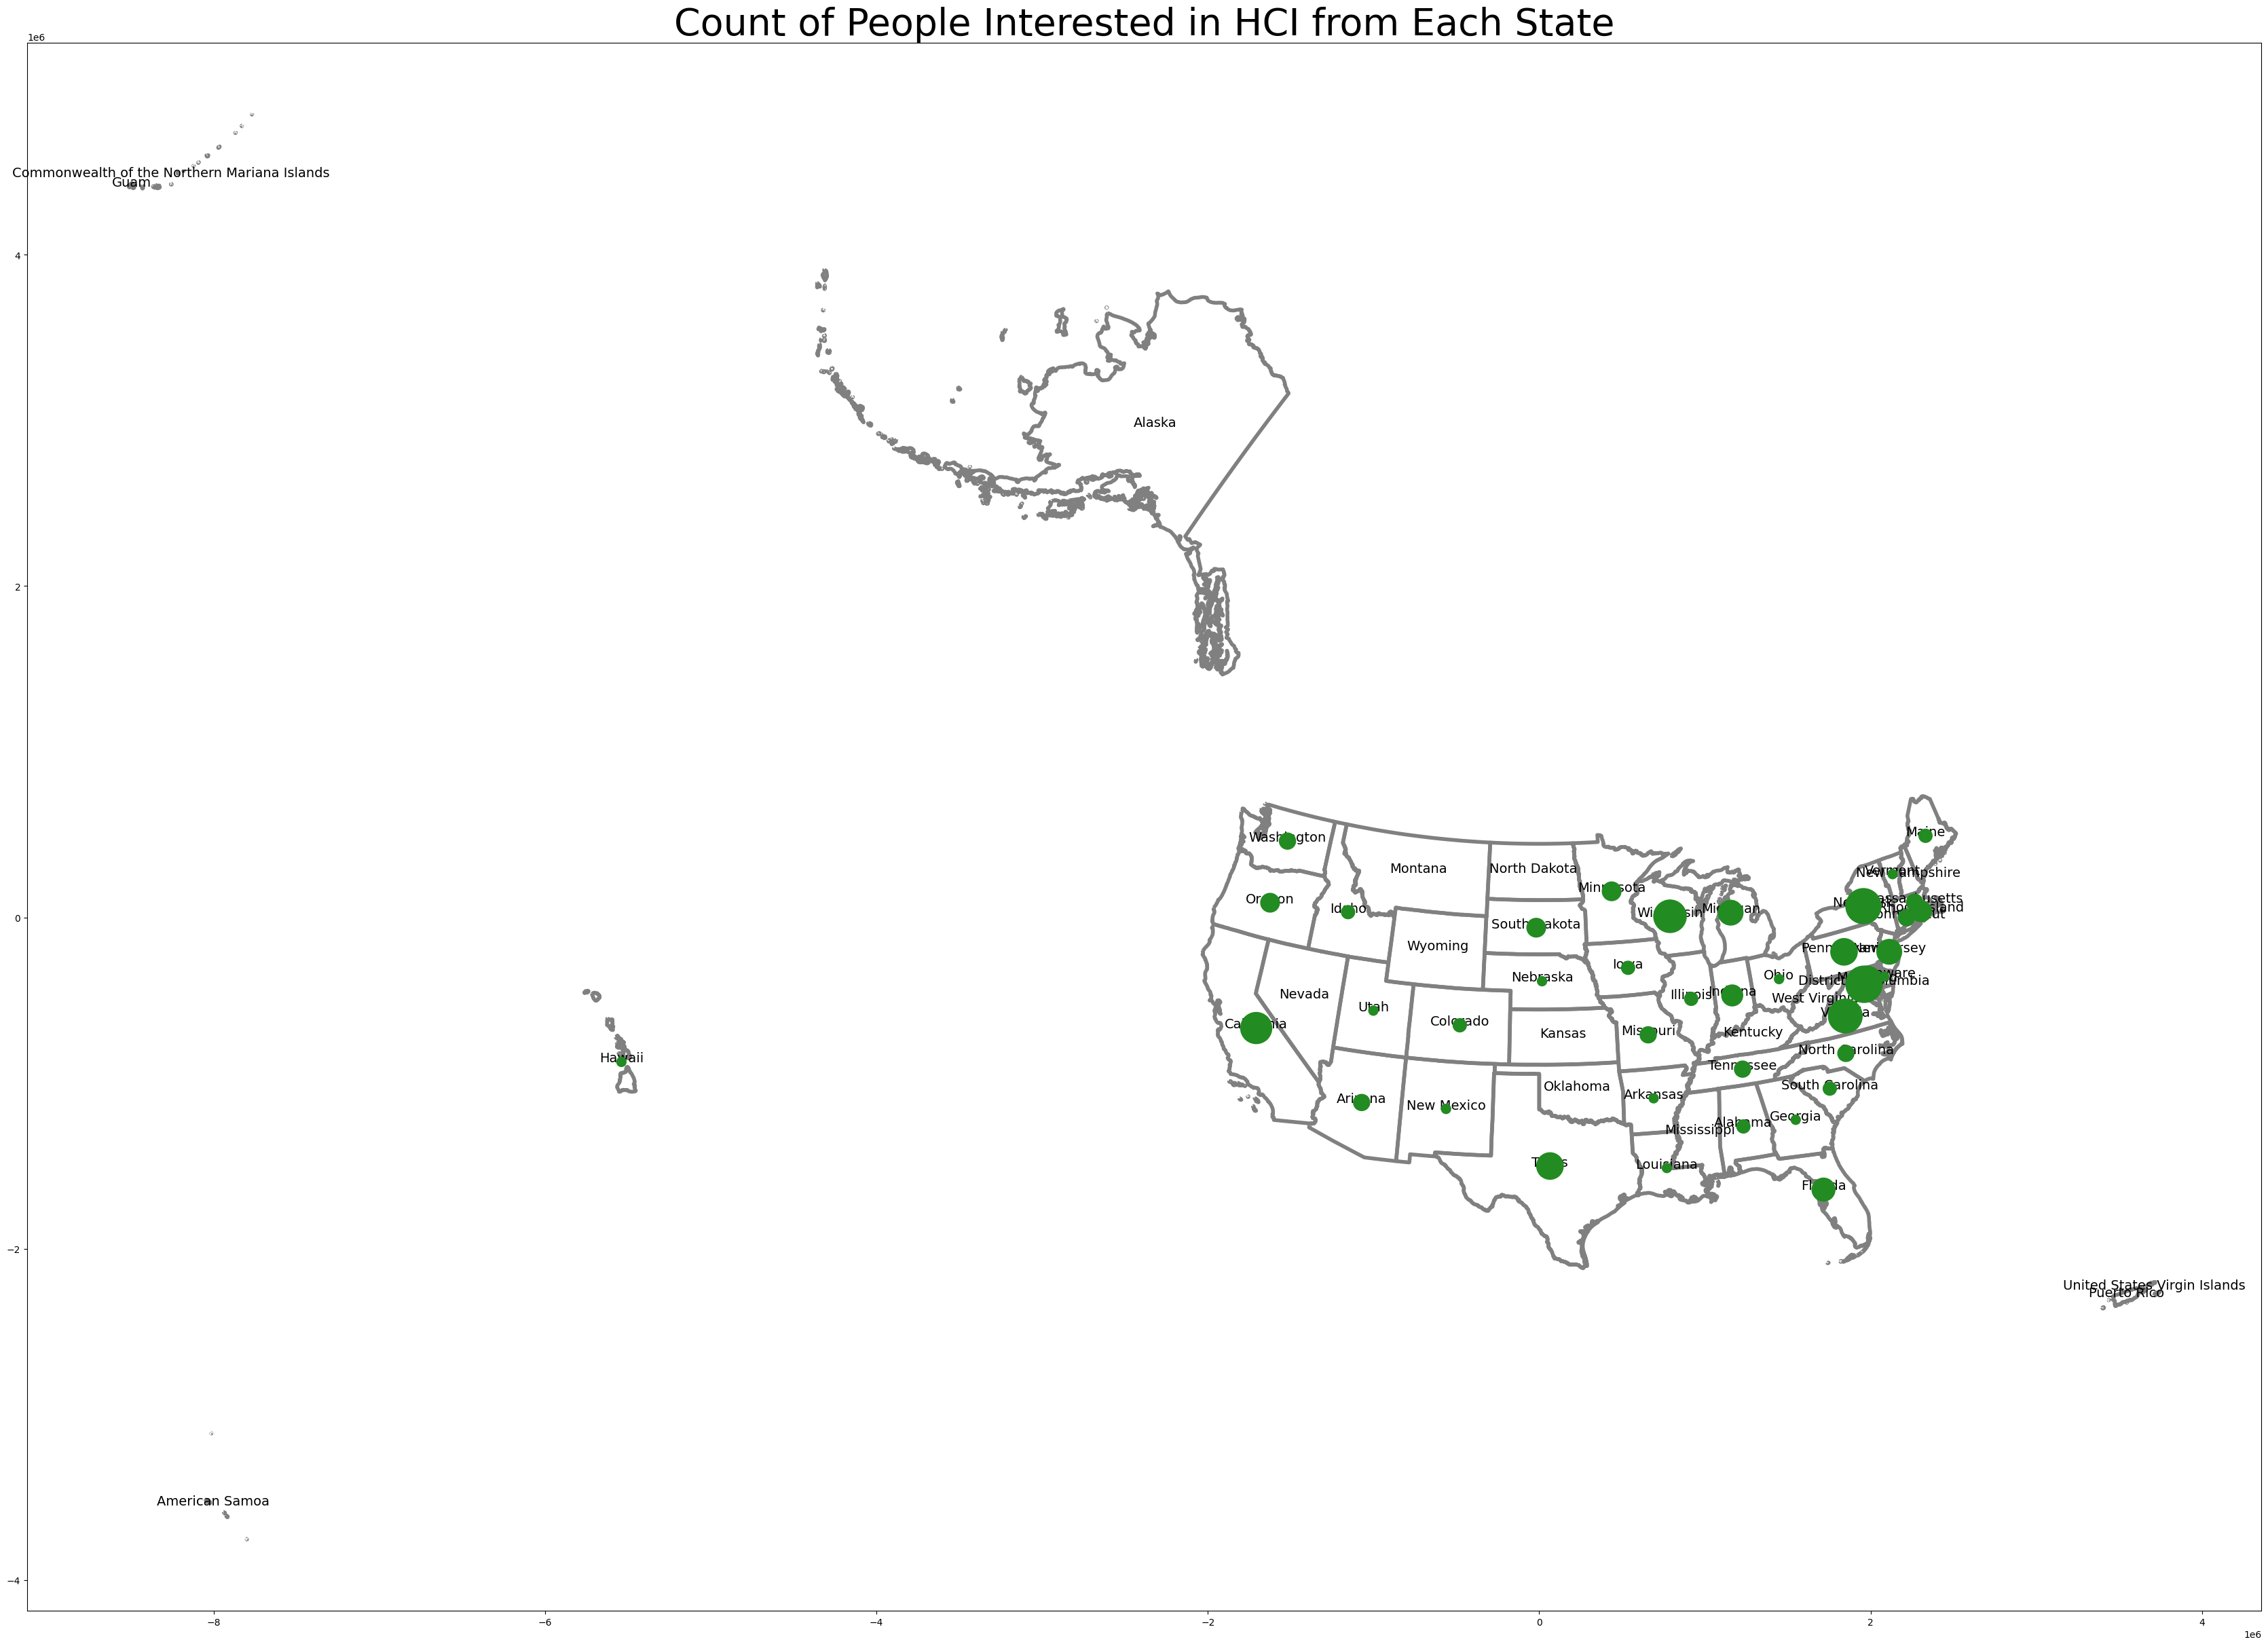

In [20]:
# plot the states map as usual
states_map = states.boundary.plot(figsize=(50, 30), color="Gray", linewidth=4)

# add the centroids to the map, using latitude and longitude from the 'centroid' column
plt.scatter(HCI_respondent_state_geometries.centroid.x, HCI_respondent_state_geometries.centroid.y, color='forestgreen', s=HCI_respondent_state_geometries['Count']*100, zorder=5)

# add state labels at the centroids
for idx, row in states.iterrows():
    # Get the centroid of each state geometry
    centroid = row['geometry'].centroid
    # Add the state name at the centroid
    plt.text(centroid.x, centroid.y, row['NAME'], fontsize=14, ha='center', color='black')

# add plot title
plt.title("Count of People Interested in HCI from Each State",fontsize=40)

# save the plot before calling plt.show()
plt.savefig('CountofPeopleInterestedinHCIfromEachState.png', bbox_inches='tight', dpi=300)

# show the plot
plt.show()

In [21]:
# read world shapefile and name it world
world = gpd.read_file("IPUMSI_world_release2024.shp")

In [22]:
# check out world
world

,OBJECTID,CNTRY_NAME,CNTRY_CODE,BPL_CODE,geometry
0,1,Algeria,012,13010.0,"MULTIPOLYGON (((-2.05592 35.0737, -2.05675 35...."
1,2,Angola,024,12010.0,"MULTIPOLYGON (((12.7976 -4.41685, 12.79875 -4...."
2,3,In dispute South Sudan/Sudan,9999,99999.0,"POLYGON ((28.08408 9.34722, 28.03889 9.34722, ..."
3,4,Benin,204,15010.0,"MULTIPOLYGON (((1.93753 6.30122, 1.93422 6.299..."
4,5,Botswana,072,14010.0,"POLYGON ((25.16312 -17.77816, 25.16383 -17.778..."
...,...,...,...,...,...
280,282,In dispute Brazil/Uruguay,9999,99999.0,"POLYGON ((-57.60586 -30.18462, -57.613 -30.189..."
281,283,Uruguay,858,23130.0,"MULTIPOLYGON (((-54.97583 -34.95042, -54.97336..."
282,284,Venezuela,862,23140.0,"MULTIPOLYGON (((-60.85136 8.60661, -60.85506 8..."
283,55,In dispute Egypt/Sudan,9999,99999.0,"MULTIPOLYGON (((36.8825 22.10042, 36.87753 22...."


In [23]:
# check out world crs
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

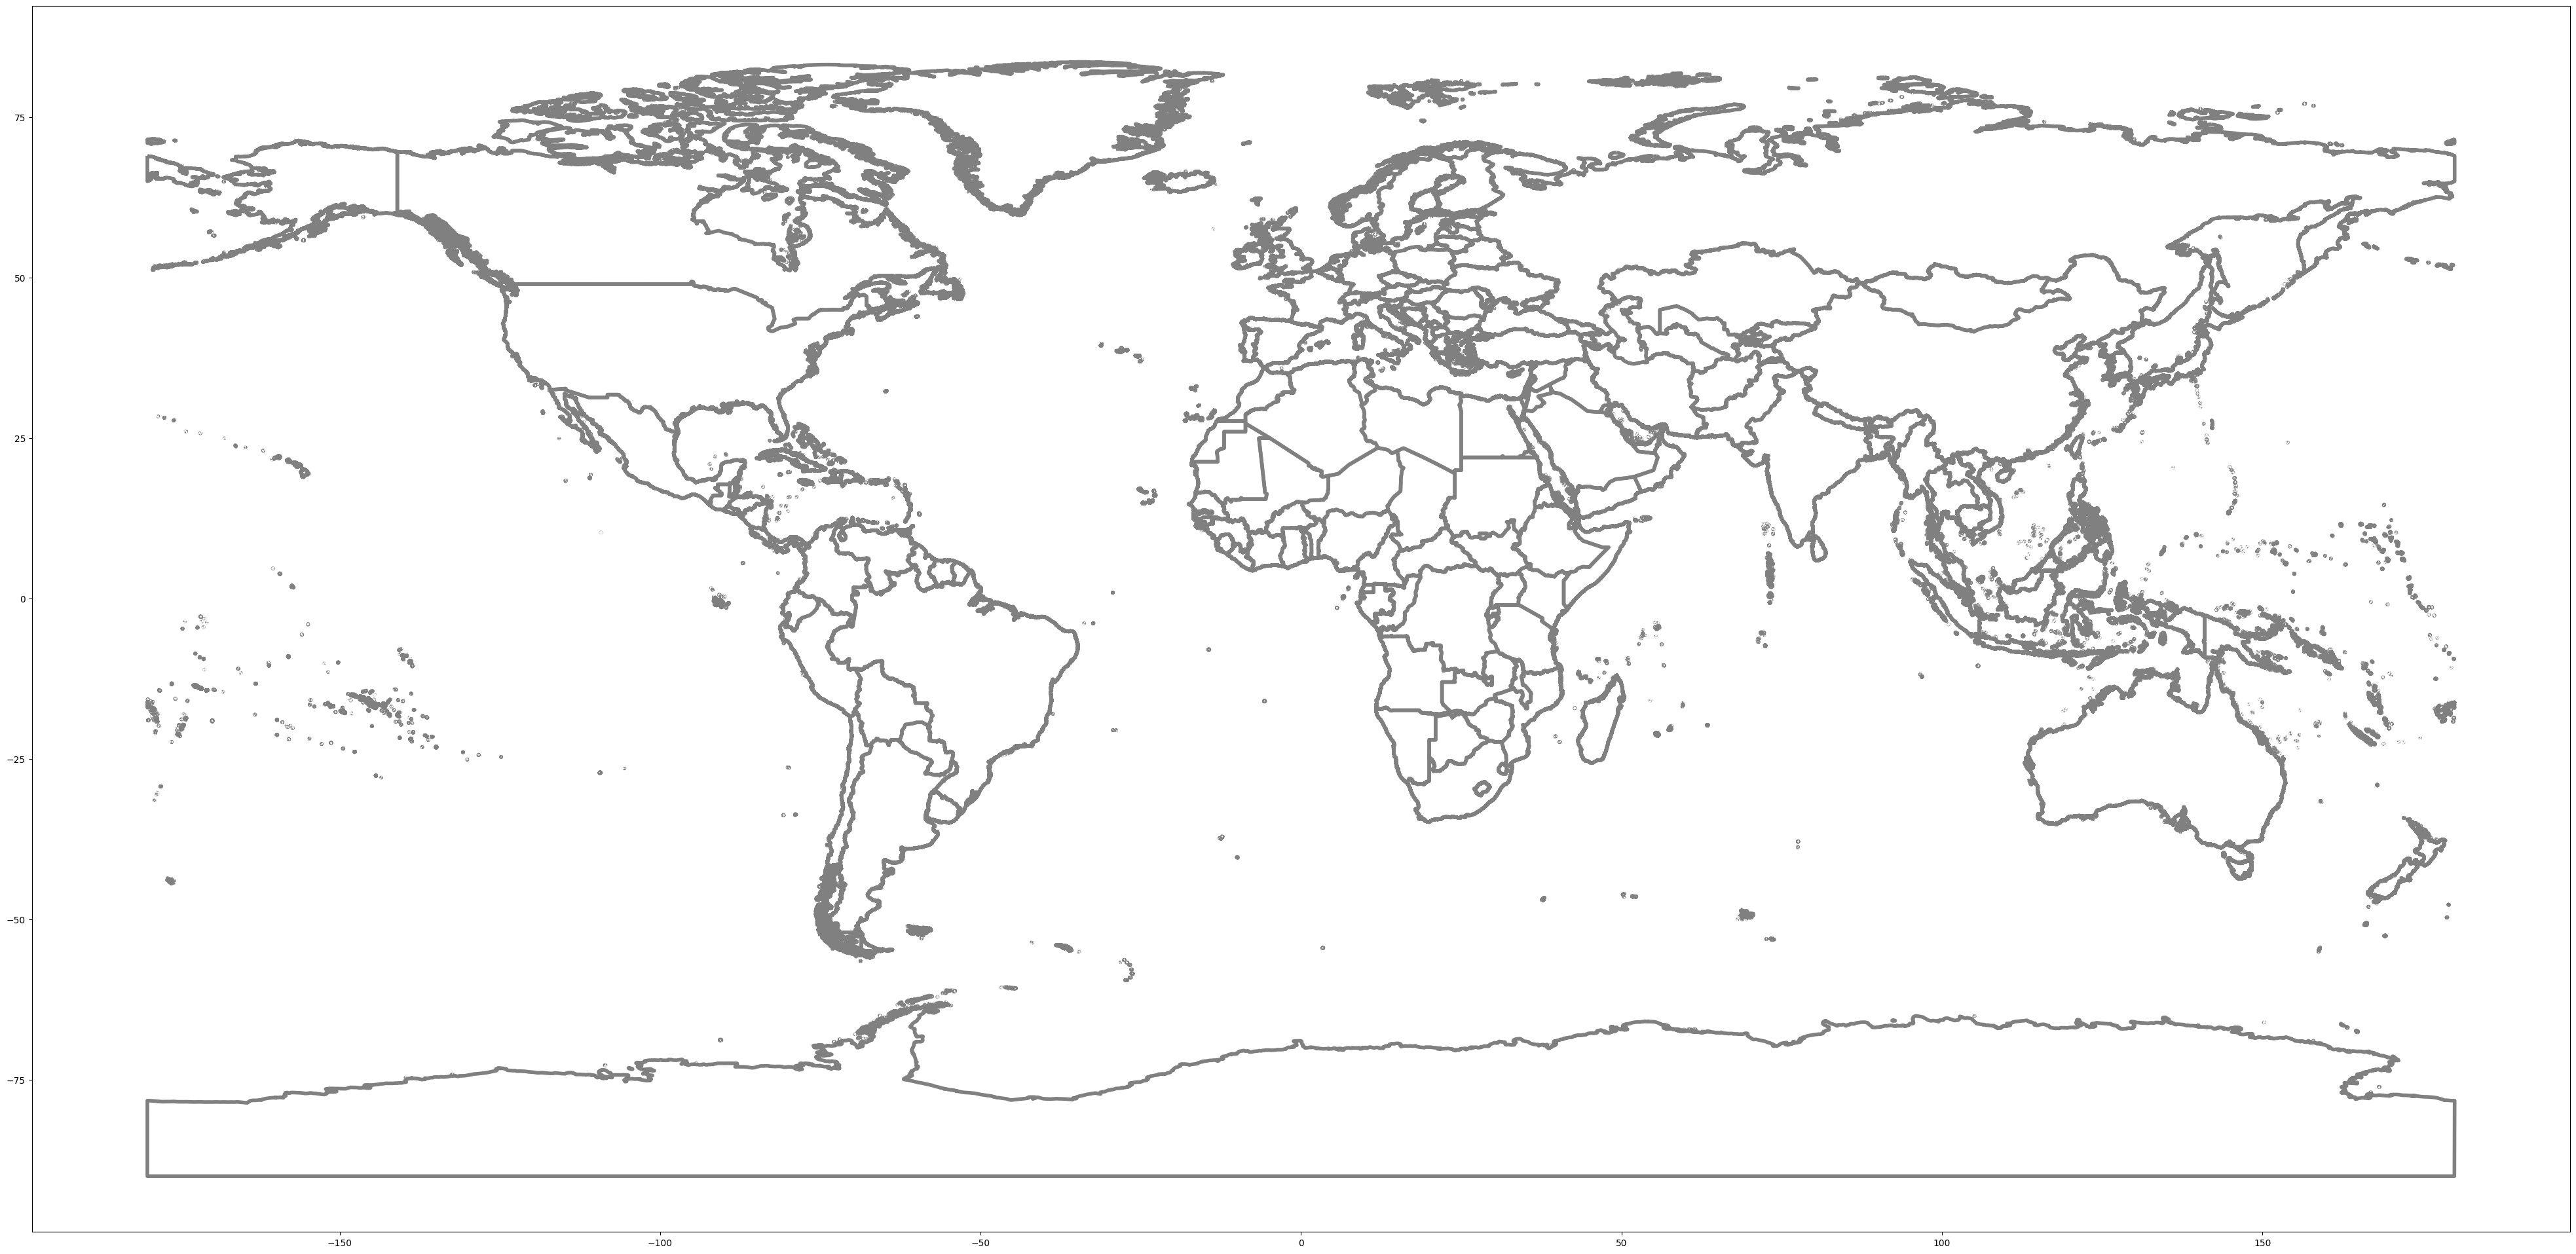

In [24]:
# plot the world map as usual
world_map = world.boundary.plot(figsize=(50, 28), color="Gray", linewidth=4)

# show the plot
plt.show()

In [25]:
# save countries that are in countire location as HCI_repsondent_country_geometries
HCI_respondent_country_geometries = world[world['CNTRY_NAME'].isin(HCI_interest_df['CountryLocation'])]

In [26]:
# check out HCI_respondent_geometries
HCI_respondent_country_geometries

,OBJECTID,CNTRY_NAME,CNTRY_CODE,BPL_CODE,geometry
15,16,Nigeria,566,15130.0,"MULTIPOLYGON (((6.61083 4.32458, 6.60997 4.324..."
84,86,India,356,32040.0,"MULTIPOLYGON (((93.80542 6.85081, 93.8 6.85042..."
86,88,Kazakhstan,398,32060.0,"MULTIPOLYGON (((50.36847 44.7578, 50.36583 44...."
104,106,Vietnam,704,33110.0,"MULTIPOLYGON (((104.88411 8.37794, 104.88164 8..."
109,111,Austria,040,44010.0,"POLYGON ((15.02888 49.0159, 15.04023 49.01068,..."
113,115,Belgium,056,44020.0,"MULTIPOLYGON (((4.93578 51.40939, 4.93634 51.4..."
119,121,Denmark,208,42010.0,"MULTIPOLYGON (((11.5125 54.62167, 11.50833 54...."
123,125,Finland,246,42040.0,"MULTIPOLYGON (((24.03083 59.29247, 24.02989 59..."
127,129,Germany,276,44040.0,"MULTIPOLYGON (((8.70132 47.71525, 8.70469 47.7..."
129,131,Greece,300,43060.0,"MULTIPOLYGON (((24.11539 34.86417, 24.11497 34..."


In [27]:
# check out world
world

,OBJECTID,CNTRY_NAME,CNTRY_CODE,BPL_CODE,geometry
0,1,Algeria,012,13010.0,"MULTIPOLYGON (((-2.05592 35.0737, -2.05675 35...."
1,2,Angola,024,12010.0,"MULTIPOLYGON (((12.7976 -4.41685, 12.79875 -4...."
2,3,In dispute South Sudan/Sudan,9999,99999.0,"POLYGON ((28.08408 9.34722, 28.03889 9.34722, ..."
3,4,Benin,204,15010.0,"MULTIPOLYGON (((1.93753 6.30122, 1.93422 6.299..."
4,5,Botswana,072,14010.0,"POLYGON ((25.16312 -17.77816, 25.16383 -17.778..."
...,...,...,...,...,...
280,282,In dispute Brazil/Uruguay,9999,99999.0,"POLYGON ((-57.60586 -30.18462, -57.613 -30.189..."
281,283,Uruguay,858,23130.0,"MULTIPOLYGON (((-54.97583 -34.95042, -54.97336..."
282,284,Venezuela,862,23140.0,"MULTIPOLYGON (((-60.85136 8.60661, -60.85506 8..."
283,55,In dispute Egypt/Sudan,9999,99999.0,"MULTIPOLYGON (((36.8825 22.10042, 36.87753 22...."


/var/folders/9l/2q5qwtpx6830grlg3g2n9wqh0000gn/T/ipykernel_33467/2762009277.py:8: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  HCI_respondent_country_geometries.plot(column='CNTRY_NAME', color='forestgreen', linewidth=0.8, ax=ax, edgecolor='0.8',


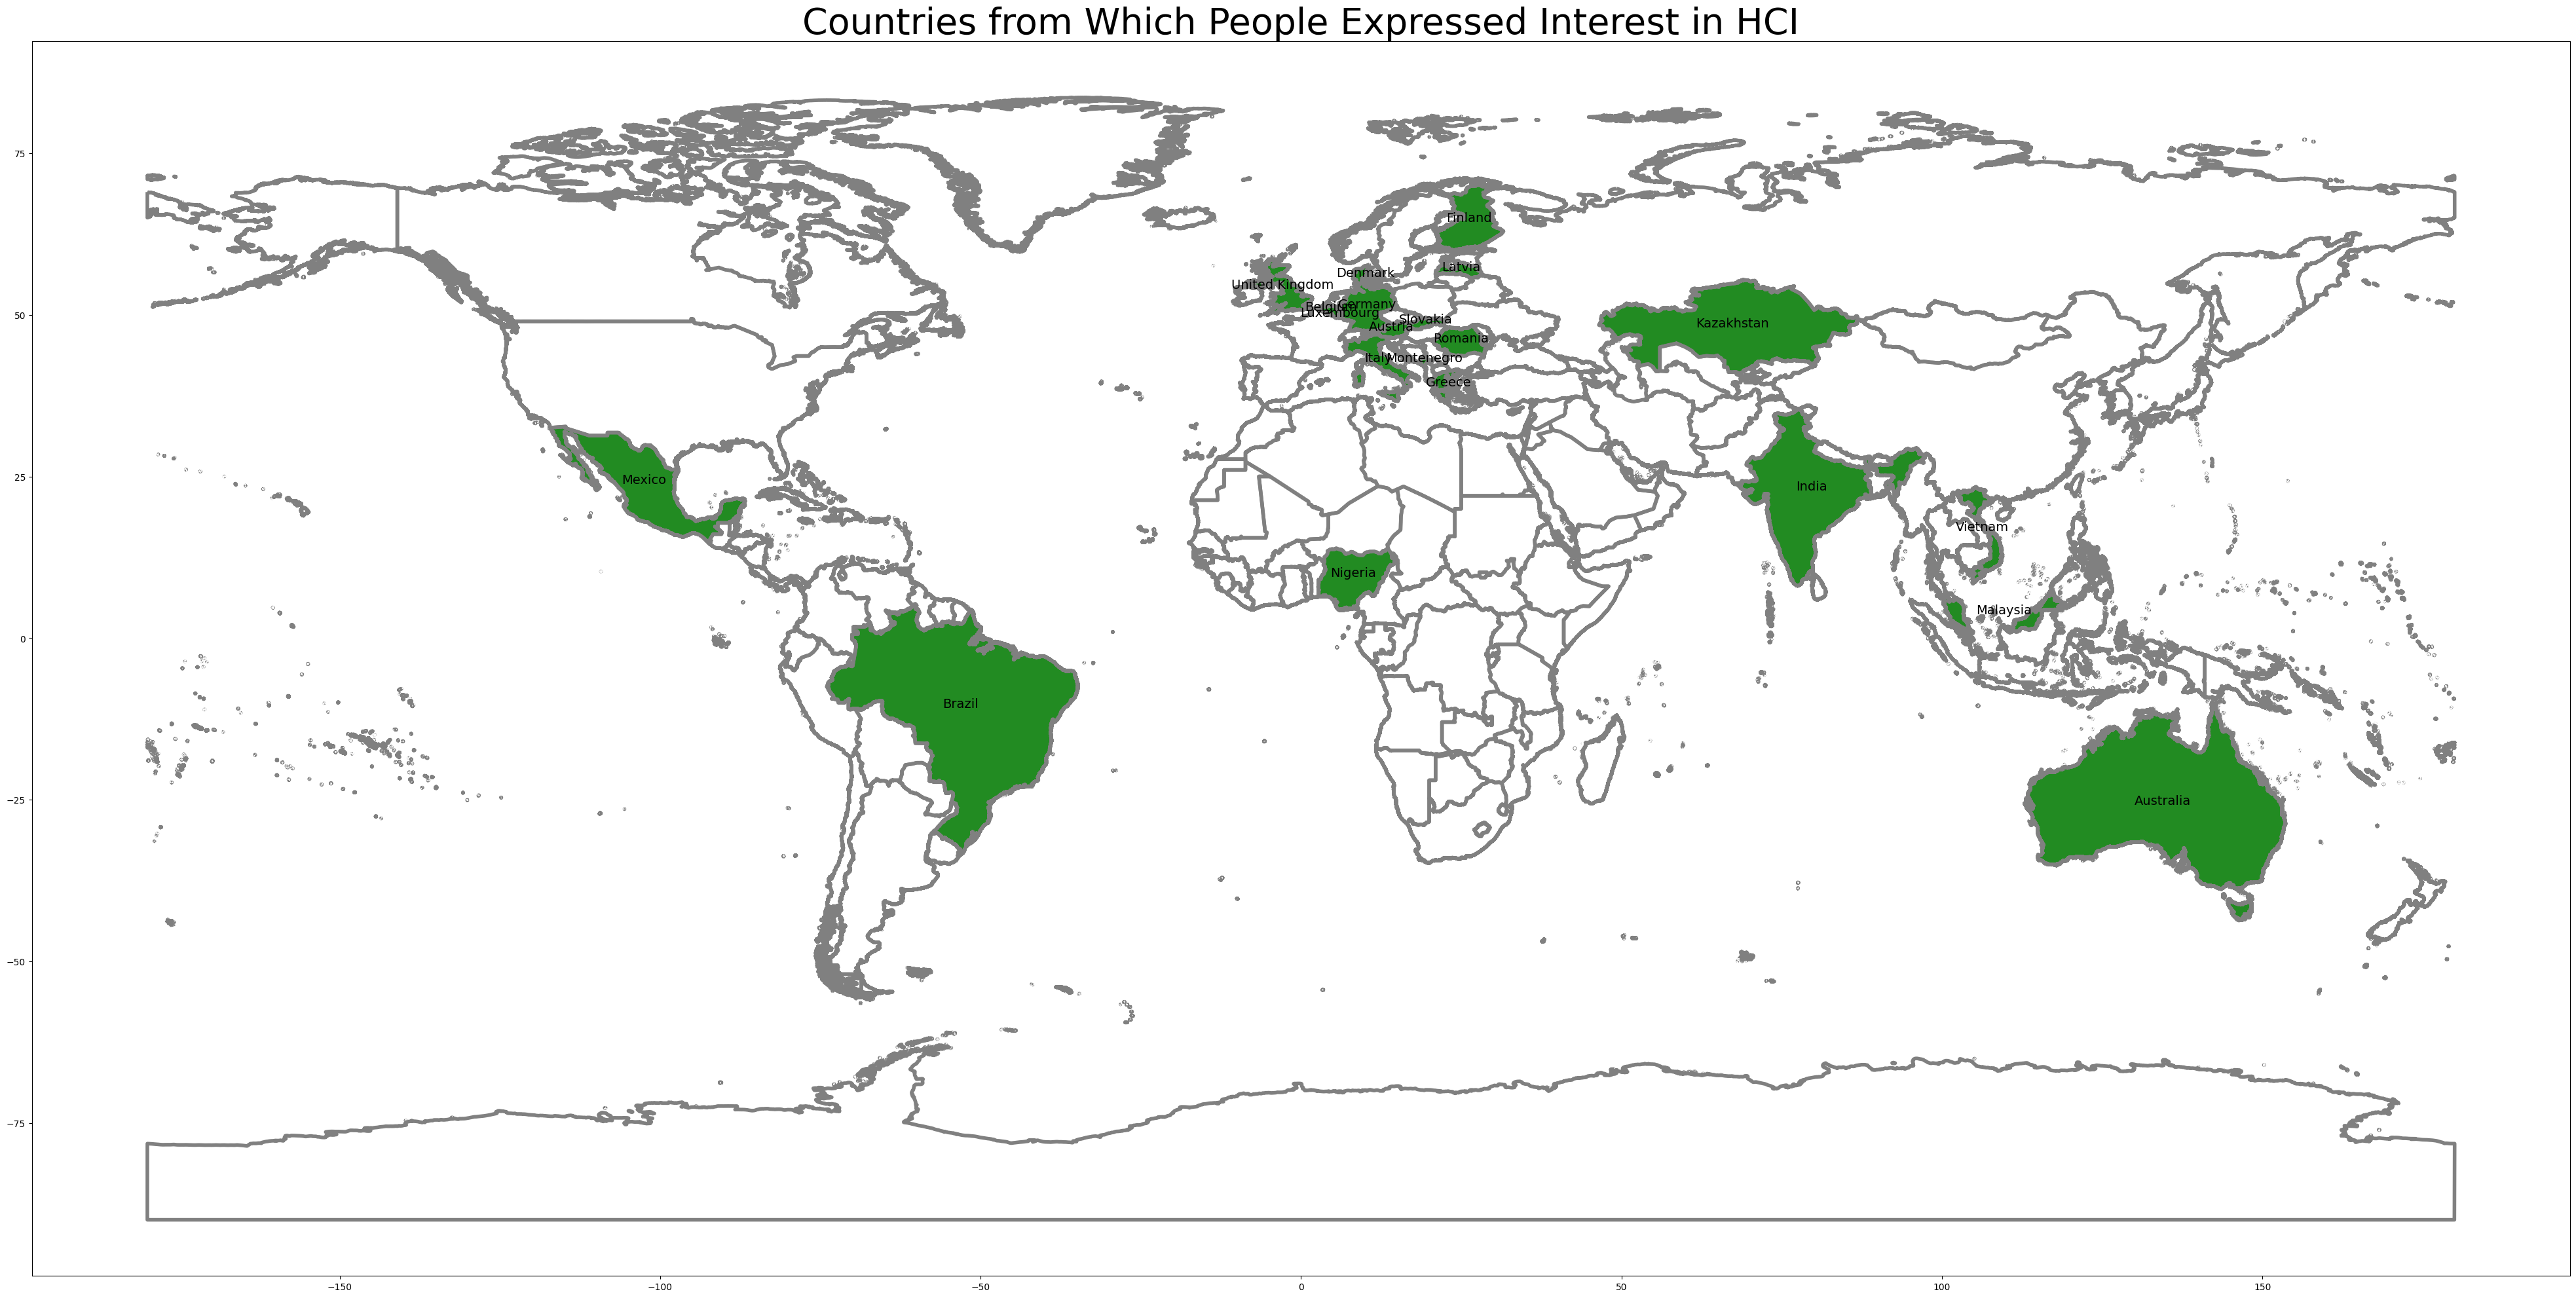

In [28]:
# create the figure and axis
fig, ax = plt.subplots(figsize=(50, 28))

# plot the world boundaries on the same ax
world.boundary.plot(ax=ax, color="Gray", linewidth=4)

# plot the HCI respondent country geometries on the same ax
HCI_respondent_country_geometries.plot(column='CNTRY_NAME', color='forestgreen', linewidth=0.8, ax=ax, edgecolor='0.8', 
                                       missing_kwds={'color': 'lightgrey', 'label': 'No data'})

# add country labels
for idx, row in HCI_respondent_country_geometries.iterrows():
    # Get the centroid of the country's geometry
    centroid = row['geometry'].centroid
    # Place the country name at the centroid
    ax.text(centroid.x, centroid.y, row['CNTRY_NAME'], fontsize=14, ha='center', color='black')

# add a plot title
plt.title("Countries from Which People Expressed Interest in HCI", fontsize=40)

# save the plot before calling plt.show()
plt.savefig('CountriesfromWhichPeopleExpressedInterestinHCI.png', bbox_inches='tight', dpi=300)

# show the plot
plt.show()

In [29]:
# analyze occupation data
# unique occupations
pd.unique(HCI_interest_df_state_to_be_mapped['Occupation'])

array(['Public history (museums, national/state parks, preservation, etc.), Academia (4-year, 2-year, community college, etc.), Student (Ph.D., Masters, Undergrad, etc.), Government (federal, state, local, etc.)',
       'Public history (museums, national/state parks, preservation, etc.), Media, journalism, etc.',
       'Media, journalism, etc., Self-employed/Consultant/Advisor',
       'Media, journalism, etc.',
       'Public history (museums, national/state parks, preservation, etc.), Academia (4-year, 2-year, community college, etc.), Information sciences, libraries, archives, etc., Social media manager',
       'Public history (museums, national/state parks, preservation, etc.)',
       'Activist, organizing, grassroots community work, etc., Tech, Web, Design, Self-employed/Consultant/Advisor',
       'Public history (museums, national/state parks, preservation, etc.), Think tanks, NGOs, nonprofits, policy',
       'Public history (museums, national/state parks, preservation, etc

In [30]:
# list of occupations
occupations = ['Public history (museums, national/state parks, preservation, etc.)',
               'Academia (4-year, 2-year, community college, etc.)',
               'Student (Ph.D., Masters, Undergrad, etc.)',
               'Think tanks, NGOs, nonprofits, policy',
               'Government (federal, state, local, etc.)',
               'Information sciences, libraries, archives, etc.',
               'Book publishing (academic press, trade press)',
               'Media, journalism, etc.',
               'Activist, organizing, grassroots community work, etc.',
               'Science, science communication, etc.',
               'Tech, Web, Design','Self-employed/Consultant/Advisor']

# create a datafram from the list of occupations
occupations_df = pd.DataFrame(occupations, columns=['Occupation'])

In [31]:
# add an empty 'Count' column to store the counts
occupations_df['Count'] = 0

# iterate through each occupation in occupations_df
for idx, occupation in occupations_df['Occupation'].items():
    # check how many times the occupation appears in HCI_interest_df_state_to_be_mapped['Occupation']
    count = HCI_interest_df_state_to_be_mapped['Occupation'].str.contains(occupation, regex=False).sum()
    
    # assign the count to the corresponding row in 'Count' column
    occupations_df.loc[idx, 'Count'] = count

# display the updated DataFrame with the counts
occupations_df

# sort occupations_df by 'Count' in descending order
sorted_occupations_df = occupations_df.sort_values(by='Count', ascending=False)

# get the top 3 occupations by count
top_3_occupations = sorted_occupations_df.head(3)

# display the top 3 occupations
print(top_3_occupations)

                                           Occupation  Count
0   Public history (museums, national/state parks,...     28
1   Academia (4-year, 2-year, community college, e...     24
11                   Self-employed/Consultant/Advisor     16


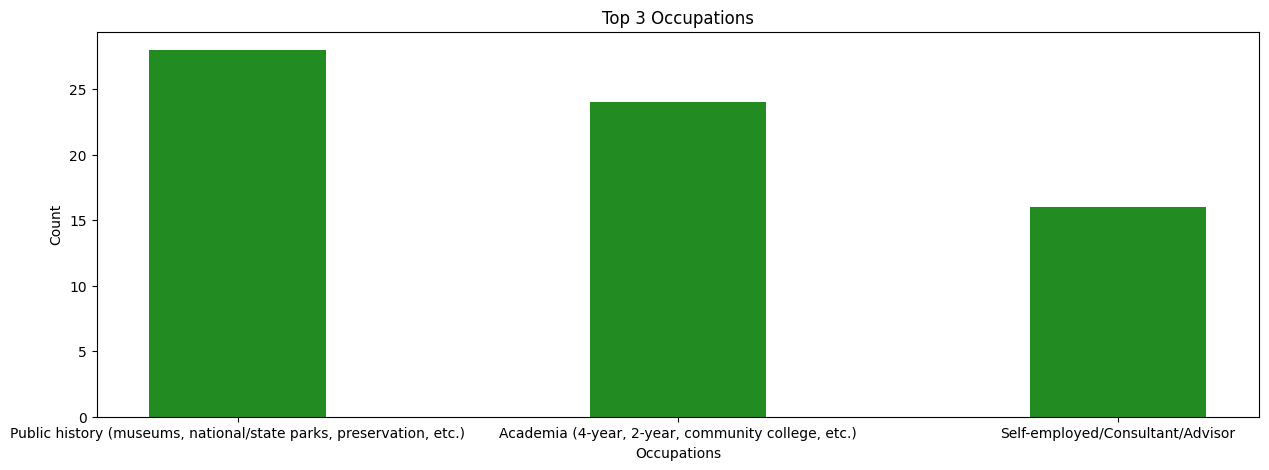

In [32]:
# create a barplot with the occupations data
fig = plt.figure(figsize = (15, 5))

# creating the bar plot
plt.bar(top_3_occupations['Occupation'], top_3_occupations['Count'], color ='forestgreen', 
        width = 0.4)

# labels and title
plt.xlabel("Occupations")
plt.ylabel("Count")
plt.title("Top 3 Occupations")

# save the plot before calling plt.show()
plt.savefig('Top3Occupations.png', bbox_inches='tight', dpi=300)

# show the plot
plt.show()

In [33]:
# analyze activities data
# unique activities interested in
pd.unique(HCI_interest_df_state_to_be_mapped['Activities Looking For'])

array(['Networking, Info sharing, skill building & other learning, Collaboration on projects, Helping my colleagues with history communication, Finding work opportunities, Finding helpful books, articles and readings',
       'Networking, Info sharing, skill building & other learning, Finding helpful books, articles and readings',
       'Networking, Info sharing, skill building & other learning, Collaboration on projects, Helping my colleagues with history communication, Teaching history communication, Finding work opportunities, Finding helpful books, articles and readings',
       'Networking, Finding helpful books, articles and readings',
       'Networking, Info sharing, skill building & other learning, Collaboration on projects, Finding work opportunities, Finding helpful books, articles and readings',
       'Info sharing, skill building & other learning, Finding helpful books, articles and readings',
       'Networking, Info sharing, skill building & other learning, Collaborati

In [34]:
# list of activities
activities = ['Networking','Info sharing, skill building & other learning','Collaboration on projects',
                                 'Helping my colleagues with history communication','Teaching history communication',
                                 'Finding work opportunities','Finding helpful books, articles and readings']

# create a dataframe from the list of occupations
activities__df = pd.DataFrame(activities, columns=['Activity Looking For'])

In [35]:
# check out activities
activities

['Networking',
 'Info sharing, skill building & other learning',
 'Collaboration on projects',
 'Helping my colleagues with history communication',
 'Teaching history communication',
 'Finding work opportunities',
 'Finding helpful books, articles and readings']

In [36]:
# check out activities_df
activities__df

,Activity Looking For
0,Networking
1,"Info sharing, skill building & other learning"
2,Collaboration on projects
3,Helping my colleagues with history communication
4,Teaching history communication
5,Finding work opportunities
6,"Finding helpful books, articles and readings"


In [37]:
# check out 'Activity Looking For' in activities_df
activities__df['Activity Looking For']

0                                          Networking
1       Info sharing, skill building & other learning
2                           Collaboration on projects
3    Helping my colleagues with history communication
4                      Teaching history communication
5                          Finding work opportunities
6        Finding helpful books, articles and readings
Name: Activity Looking For, dtype: object

In [38]:
# add an empty 'Count' column to store the counts
activities__df['Count'] = 0

# iterate through each activity in activities_df
for idx, activity in activities__df['Activity Looking For'].items():
    # check how many times the activity appears in HCI_interest_df_state_to_be_mapped['Activity Looking For']
    count = HCI_interest_df_state_to_be_mapped['Activities Looking For'].str.contains(activity, regex=False).sum()
    
    # assign the count to the corresponding row in 'Count' column
    activities__df.loc[idx, 'Count'] = count

# display the updated dataframe with the counts
activities__df

# sort activities_df by 'Count' in descending order
sorted_activities__df = activities__df.sort_values(by='Count', ascending=False)

# get the top 3 occupations by count
top_3_activities = sorted_activities__df.head(3)

# display the top 3 occupations
print(top_3_activities)

                            Activity Looking For  Count
1  Info sharing, skill building & other learning     65
0                                     Networking     58
6   Finding helpful books, articles and readings     57


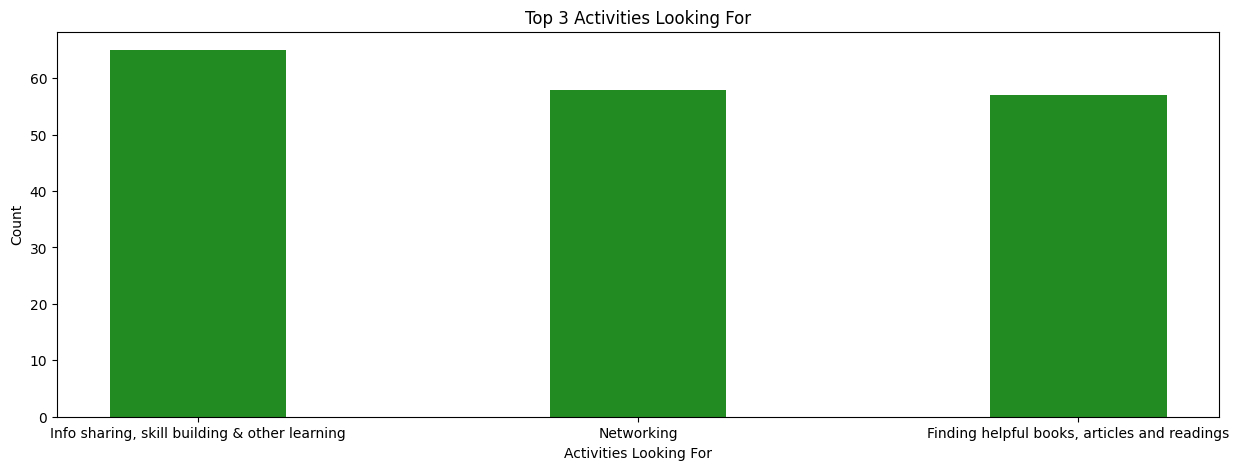

In [39]:
# create a barplot with the activities data
fig = plt.figure(figsize = (15, 5))

# creating the bar plot
plt.bar(top_3_activities['Activity Looking For'], top_3_activities['Count'], color ='forestgreen', 
        width = 0.4)

# labels and title
plt.xlabel("Activities Looking For")
plt.ylabel("Count")
plt.title("Top 3 Activities Looking For")

# save the plot before calling plt.show()
plt.savefig('Top3Activities.png', bbox_inches='tight', dpi=300)

# show the plot
plt.show()

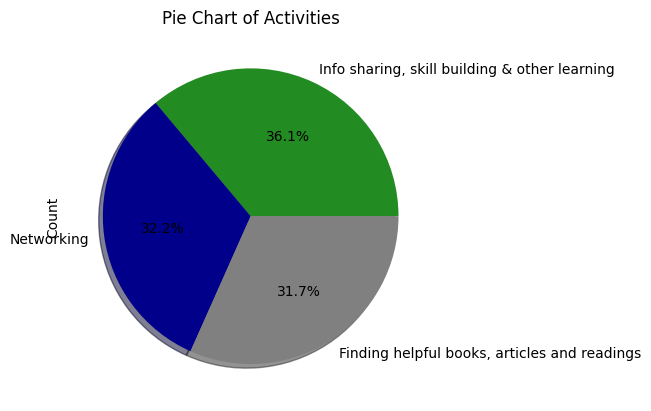

In [40]:
# set index fo top 3 activities
top_3_activities.set_index('Activity Looking For', inplace=True)

top_3_activities.plot.pie(y='Count', title="Pie Chart of Activities", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0), \
                   shadow=True, startangle=0,colors=['forestgreen','darkblue','grey'])

# save the plot before calling plt.show()
plt.savefig('PieChartofTop3Activitties.pdf')

In [41]:
# analyze expertise level data
# unique expertise levels
pd.unique(HCI_interest_df_state_to_be_mapped['Expertise Level'])

array(['Beginner - new to the field, eager to learn more',
       'Mid career - some experience, interested in growing',
       'Expert - I have a lot of experience, happy to share, and always happy to learn',
       nan], dtype=object)

In [42]:
# list of expertise levels
expertiselevels = ['Beginner','Mid career','Expert']

# create a dataframe from the list of occupations
expertiselevels__df = pd.DataFrame(expertiselevels, columns=['Expertise Level'])

In [43]:
# check out expertiselevels
expertiselevels

['Beginner', 'Mid career', 'Expert']

In [44]:
# check out expertiselevels_df
expertiselevels__df

,Expertise Level
0,Beginner
1,Mid career
2,Expert


In [45]:
# add an empty 'Count' column to store the counts
expertiselevels__df['Count'] = 0

# iterate through each expertise level in expertiselevels_df
for idx, expertiselevel in expertiselevels__df['Expertise Level'].items():
    # check how many times the expertiselevel appears in HCI_interest_df_state_to_be_mapped['Expertise Level']
    count = HCI_interest_df_state_to_be_mapped['Expertise Level'].str.contains(expertiselevel, regex=False).sum()
    
    # assign the count to the corresponding row in 'Count' column
    expertiselevels__df.loc[idx, 'Count'] = count

# display the updated dataframe with the counts
expertiselevels__df

,Expertise Level,Count
0,Beginner,22
1,Mid career,37
2,Expert,14


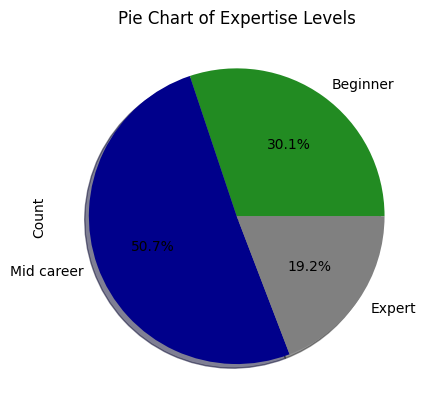

In [46]:
# set index fo top 3 activities
expertiselevels__df.set_index('Expertise Level', inplace=True)

expertiselevels__df.plot.pie(y='Count', title="Pie Chart of Expertise Levels", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0), \
                   shadow=True, startangle=0,colors=['forestgreen','darkblue','grey'])

# save the plot before calling plt.show()
plt.savefig('PieChartofExpertiseLevels.pdf')

In [47]:
# analyze type of history communication interested in
# unique topic interests
pd.unique(HCI_interest_df_state_to_be_mapped['History Communication Topics of Interest'])

array(['Social media, Broadcast media and journalism, Teaching / pedagogy, Podcasting, social audio, Writing for a general audience, blogging, op-eds, newsletter, Strategy, strategic communications, Emerging technologies (AR, VR, Web 3.0), Documentary, filmmaking, Short-form video (YouTube, TikTok, etc.)',
       'Broadcast media and journalism, Teaching / pedagogy, Writing for a general audience, blogging, op-eds, newsletter',
       'Social media, Broadcast media and journalism, Podcasting, social audio, Writing for a general audience, blogging, op-eds, newsletter, Strategy, strategic communications, Documentary, filmmaking, Short-form video (YouTube, TikTok, etc.)',
       'Podcasting, social audio, Writing for a general audience, blogging, op-eds, newsletter, Strategy, strategic communications',
       'Social media, Broadcast media and journalism, Podcasting, social audio, Writing for a general audience, blogging, op-eds, newsletter, Strategy, strategic communications, Emerging te

In [48]:
# list of topic interests
topicinterests = ['Social media','Broadcast media and journalism","Teaching / pedagogy',
                                     'Podcasting, social audio', 'Writing for a general audience, blogging, op-eds, newsletter',
                                     'Strategy, strategic communications','Emerging technologies (AR, VR, Web 3.0)','Documentary, filmmaking',
                                     'Short-form video (YouTube, TikTok, etc.)']

# create a dataframe from the list of occupations
topicinterests__df = pd.DataFrame(topicinterests, columns=['History Communication Topics of Interest'])

In [49]:
# check out topicinterests
topicinterests

['Social media',
 'Broadcast media and journalism","Teaching / pedagogy',
 'Podcasting, social audio',
 'Writing for a general audience, blogging, op-eds, newsletter',
 'Strategy, strategic communications',
 'Emerging technologies (AR, VR, Web 3.0)',
 'Documentary, filmmaking',
 'Short-form video (YouTube, TikTok, etc.)']

In [50]:
# check out topicinterests_df
topicinterests__df

,History Communication Topics of Interest
0,Social media
1,"Broadcast media and journalism"",""Teaching / pe..."
2,"Podcasting, social audio"
3,"Writing for a general audience, blogging, op-e..."
4,"Strategy, strategic communications"
5,"Emerging technologies (AR, VR, Web 3.0)"
6,"Documentary, filmmaking"
7,"Short-form video (YouTube, TikTok, etc.)"


In [52]:
# add an empty 'Count' column to store the counts
topicinterests__df['Count'] = 0

# iterate through each expertise level in topicinterests_df
for idx, topicinterest in topicinterests__df['History Communication Topics of Interest'].items():
    # check how many times the expertiselevel appears in HCI_interest_df_state_to_be_mapped['History Communication Topics of Interest']
    count = HCI_interest_df_state_to_be_mapped['History Communication Topics of Interest'].str.contains(topicinterest, regex=False).sum()
    
    # assign the count to the corresponding row in 'Count' column
    topicinterests__df.loc[idx, 'Count'] = count

# display the updated dataframe with the counts
topicinterests__df

# sort expertiselevels_df by 'Count' in descending order
sorted_topicinterests__df = topicinterests__df.sort_values(by='Count', ascending=False)

# get the top 3 occupations by count
top_3_topicinterests = sorted_topicinterests__df.head(3)

# display the top 3 occupations
print(top_3_topicinterests)

            History Communication Topics of Interest  Count
3  Writing for a general audience, blogging, op-e...     47
0                                       Social media     46
4                 Strategy, strategic communications     44


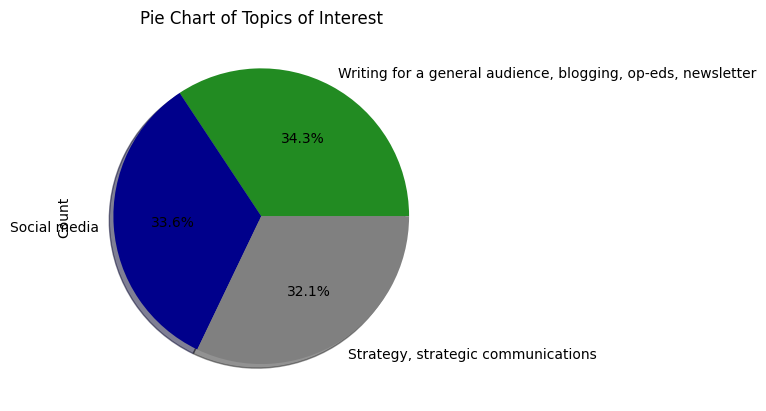

In [53]:
# set index fo top 3 topic interests
top_3_topicinterests.set_index('History Communication Topics of Interest', inplace=True)

top_3_topicinterests.plot.pie(y='Count', title="Pie Chart of Topics of Interest", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0), \
                   shadow=True, startangle=0,colors=['forestgreen','darkblue','grey'])

# save the plot before calling plt.show()
plt.savefig('PieChartofTopicsofInterest.pdf')